https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3


### Preparing the Data 
The MNIST dataset provides centred 28x28 images of handwritten numbers. These images are stored as 28x28 matrix with values between 0-255, to represent the intensity of light. However, when using a fully connected neural network the input data must be a vector. Therefore a vector of length 28x28=784 is needed. Convolutional neural networks can be used to maintain spatial relationships from the flattening process.

Neural networks typically need an input from 0-1, rather than from 0-255 so we will need to scale our values. Furthermore, as this is a classification problem we need to one-hot encode our values so that the computer doesn't think that we have results on a continuous range. 


In [23]:
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras 

from keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


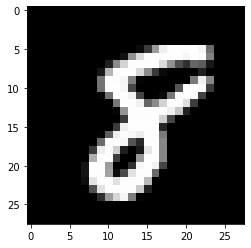

Number 8


In [25]:
data_point = 777
plt.imshow(x_train[data_point], cmap='gray')
plt.show()
print(f'Number {y_train[data_point]}')

In [29]:
image_vector_size=28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_train = (x_train/255).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
x_test = (x_test/255).astype('float32')


In [27]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
print(f'One-hot encoded number: {y_train[data_point]}')

One-hot encoded number: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### Building the Network
Dense layers are fully connected layers. 

The input layer needs 784(=28x28) entries for the image vector and the output layer is defined by the number of classes we are predicting on. The output layer uses a softmax function that normalises the values from the 10 output nodes such that:
* all the values are between 0 and 1 
* the sum of all of the values is 1 

Therefore, we can treat these output values as probabilities. In machine learning the softmax function is almost always used when the model's output is a one-hot encoded vector. 

In [30]:
from keras.models import Sequential 
from keras.layers import Dense 

In [31]:
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


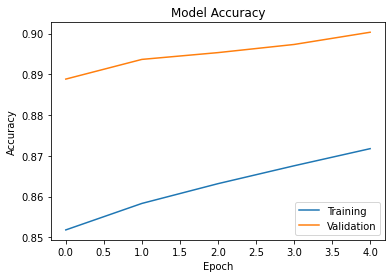

Test loss 0.518
Test accuracy: 0.883


In [34]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=0, validation_split=0.1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Test loss {loss:0.3}')
print(f'Test accuracy: {accuracy:0.3}')

### Network Depth
Adding layers can cause overfitting. 

Layer width determines how many nodes are in each layer, adding layer width therfore adds more tunable parameters.

In [47]:
def create_dense_network(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_vector_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units=s, activation='sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

def evaluate(model, batch_size, epochs):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(f'Test loss {loss:0.3}')
    print(f'Test accuracy: {accuracy:0.3}')
    print('----------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------')
    print()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                25120     
                                                                 
 dense_47 (Dense)            (None, 32)                1056      
                                                                 
 dense_48 (Dense)            (None, 32)                1056      
                                                                 
 dense_49 (Dense)            (None, 32)                1056      
                                                                 
 dense_50 (Dense)            (None, 32)                1056      
                                                                 
 dense_51 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,674
Trainable params: 29,674
Non-tra

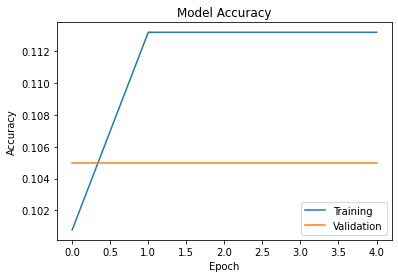

Test loss 2.3
Test accuracy: 0.113
----------------------------------------------------------------------------
----------------------------------------------------------------------------



In [50]:
model = create_dense_network([32]*5)
evaluate(model, 128, 5)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                25120     
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


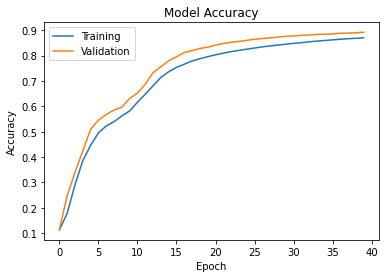

Test loss 0.459
Test accuracy: 0.877
----------------------------------------------------------------------------
----------------------------------------------------------------------------



In [51]:
model = create_dense_network([32]*2)
evaluate(model, 128, 40)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                50240     
                                                                 
 dense_64 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


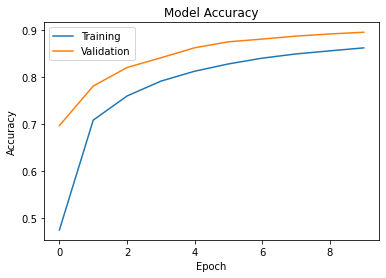

Test loss 0.559
Test accuracy: 0.876
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 256)               200960    
                                                                 
 dense_66 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


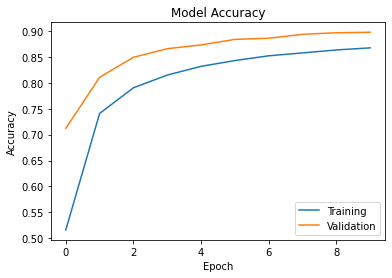

Test loss 0.493
Test accuracy: 0.882
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 1024)              803840    
                                                                 
 dense_68 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


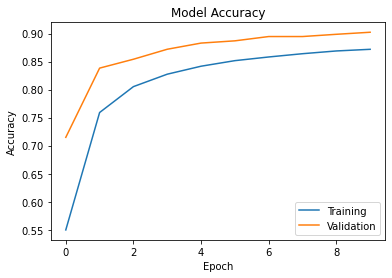

Test loss 0.463
Test accuracy: 0.884
----------------------------------------------------------------------------
----------------------------------------------------------------------------



In [54]:
for nodes in [64, 256, 1024]:
    model = create_dense_network([nodes])
    evaluate(model, 128, 10)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 32)                25120     
                                                                 
 dense_70 (Dense)            (None, 32)                1056      
                                                                 
 dense_71 (Dense)            (None, 32)                1056      
                                                                 
 dense_72 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


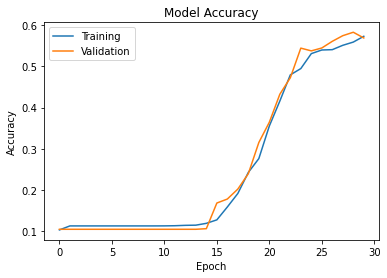

Test loss 1.54
Test accuracy: 0.565
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 32)                25120     
                                                                 
 dense_74 (Dense)            (None, 32)                1056      
                                                                 
 dense_75 (Dense)            (None, 32)                1056      
                                                                 
 dense_76 (Dense)            (None, 32)                1056      
                                                                 
 dense_77 (Dense)            (None, 10)                330       
                                                            

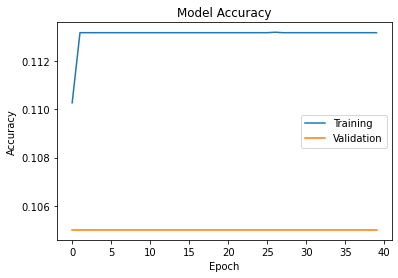

Test loss 2.29
Test accuracy: 0.113
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 128)               100480    
                                                                 
 dense_79 (Dense)            (None, 128)               16512     
                                                                 
 dense_80 (Dense)            (None, 128)               16512     
                                                                 
 dense_81 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
______________________________________________________

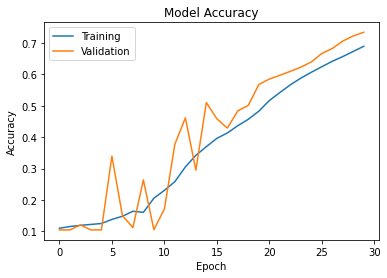

Test loss 0.959
Test accuracy: 0.704
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 128)               100480    
                                                                 
 dense_83 (Dense)            (None, 128)               16512     
                                                                 
 dense_84 (Dense)            (None, 128)               16512     
                                                                 
 dense_85 (Dense)            (None, 128)               16512     
                                                                 
 dense_86 (Dense)            (None, 10)                1290      
                                                           

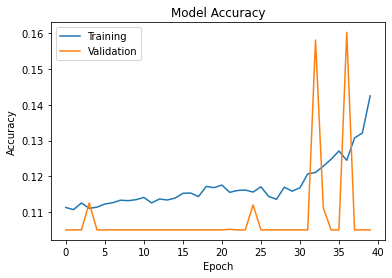

Test loss 2.28
Test accuracy: 0.114
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 512)               401920    
                                                                 
 dense_88 (Dense)            (None, 512)               262656    
                                                                 
 dense_89 (Dense)            (None, 512)               262656    
                                                                 
 dense_90 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
______________________________________________________

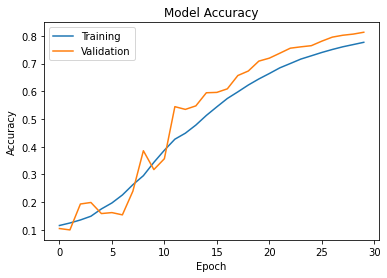

Test loss 0.697
Test accuracy: 0.788
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 512)               401920    
                                                                 
 dense_92 (Dense)            (None, 512)               262656    
                                                                 
 dense_93 (Dense)            (None, 512)               262656    
                                                                 
 dense_94 (Dense)            (None, 512)               262656    
                                                                 
 dense_95 (Dense)            (None, 10)                5130      
                                                           

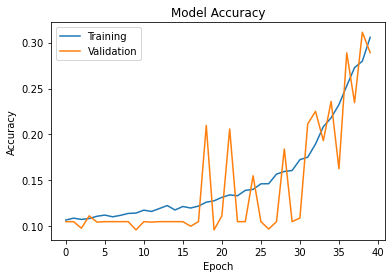

Test loss 2.15
Test accuracy: 0.29
----------------------------------------------------------------------------
----------------------------------------------------------------------------



In [55]:
for nodes_per_layer in [32, 128, 512]:
    for layers in [3, 4]:
        model = create_dense_network([nodes_per_layer]*layers)
        evaluate(model, 128, 10*layers)